In [7]:
from torch.utils.data import DataLoader
from dataset import AudioInstrumentDataset
from torch.optim import SGD
import torch.nn as nn
import numpy as np
from model import CNNInstrumentClassifier
from constants import *

In [8]:
sequence_length = int(SAMPLE_RATE*0.5)

train_data = AudioInstrumentDataset(r"train_metadata.csv", sequence_length=sequence_length)

loader = DataLoader(train_data, batch_size=32, shuffle=True)

model = CNNInstrumentClassifier()

def train(loader, model, n_epochs=20):
    # Optimization
    opt = SGD(model.parameters(), lr=0.01)
    Loss = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        N = len(loader)
        for i, (x, y) in enumerate(loader):
            opt.zero_grad()
            loss_value = Loss(model(x), y)
            loss_value.backward()
            opt.step()

            losses.append(loss_value.item())
            epochs.append(epoch + i / N)
        print(f'Epoch {epoch}, Loss: {loss_value.item()}')
    return np.array(epochs), np.array(losses)


In [9]:
epoch_data, loss_data = train(loader, model)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [32, 1, 1, 128, 32]

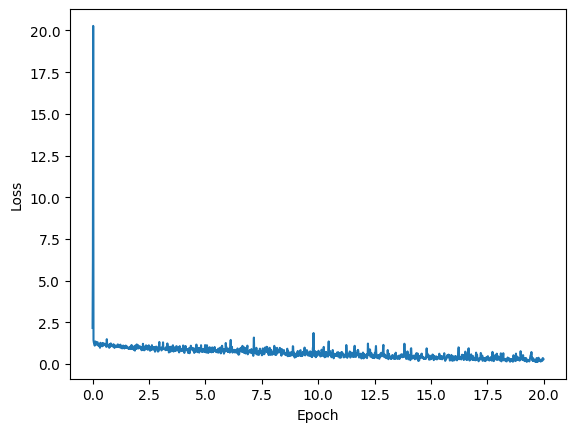

In [8]:
import matplotlib.pyplot as plt
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
test_data = AudioInstrumentDataset(r"test_metadata.csv", sequence_length=sequence_length)
xs, ys = zip(*[test_data[i] for i in range(len(test_data))])

In [ ]:
# Convert to tensors (assuming they are NumPy arrays or lists)
xs = torch.stack(xs)  # Convert list of tensors to a single tensor
ys = torch.stack(ys)  # Convert list of one-hot encoded labels to a single tensor

# Run inference
model.eval()
yhats = model(xs).argmax(dim=1)  # Predict class indices
test_accuracy = (yhats == ys.argmax(dim=1)).sum().item() / len(ys)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8621378621378621
